# Scatter Plot - Dağılım Grafiği

Scatter Plot (Dağılım Grafiği) 2 boyutlu olarak iki değerin birbirine göre değişimini incelemek için kullanılır. Line Plot (Çizgi Grafiğe) benzer. Farklı olarak line plot içerisinde kesişim noktaları birbirine çizgi ile birleştirilir. Scatter plot genellikle trendi görmek için çizdirilir. 

Scatter plot çizdirmek için <code>df.plot(kind="scatter")</code> plot metodu içerisinde kind parametresine scatter değeri atanır.

Örnekte kullandığımız veri setine ulaşmak için: 

https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp

In [1]:
import numpy as np
import pandas as pd

## Datanın oluşturulması

In [2]:
# Grafikte kullanacağımız datayı yükleyelim.
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# Bize gerekli olmayan kolonları silelim
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# Kolon isimlerini değiştirelim
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# Kolon isimlerini string yapalım
df_can.columns = list(map(str, df_can.columns))
# Country kolonunu index yapalım
df_can.set_index('Country', inplace=True)
# Index adını silelim
df_can.index.name=None
# Grafik çizerken kullanmak üzere years adınsa bir dizi oluşturalım
years = list(map(str, range(1980, 2014)))

## Grafiğin oluşturulması

In [3]:
%matplotlib inline

import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.style.use("ggplot")

Örnek olarak yıllara göre Kanadaya gelen toplam göçmen sayısını inceleyeceğiz. Bu sebeple önce verimizi hazırlayalım.

In [4]:
# Yıllara göre göçmen sayılarını toplayıp yeni bir dataframe oluşturuyorum
df_total=pd.DataFrame(df_can[years].sum()) 
# Yeni dataframe'in index değerlerin integer yapıyorum. Daha sonra sıralama yaparken doğru bir şekilde yapsın diye
df_total.index=map(int,df_total.index) 
# Yıl değerini tekrar kolon olarak eklemesi için index'i resetliyorum.
df_total.reset_index(inplace=True)
# Son olarak kolon adlarının değiştiriyorum.
df_total.columns=["year","total"]
# Veriye bakalım
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


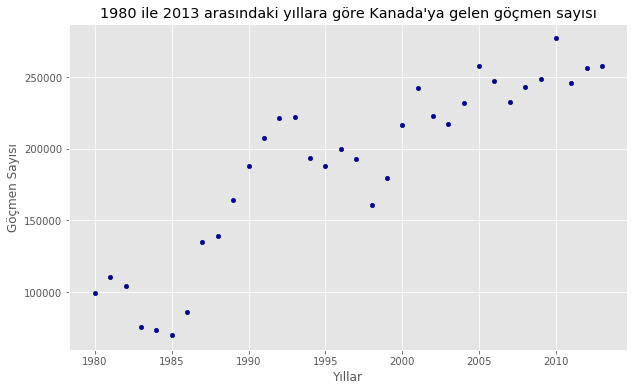

In [5]:
# Grafiği çizdirelim
df_total.plot(kind="scatter",figsize=(10,6), x="year",y="total",color="darkblue")

plt.title("1980 ile 2013 arasındaki yıllara göre Kanada'ya gelen göçmen sayısı")
plt.ylabel("Göçmen Sayısı")
plt.xlabel("Yıllar")
plt.show()

Yukarıdaki grafik bize yıllara göre yükselen bir trend ile göçmen sayısının arttığını söylüyor. Bunu en iyi açıklayan bir çizgi  çizmek için ***numpy*** <code>polyfit()</code> metodunun kullanabiliriz. Bu çizgi bize tahmin yapmak için kullanacağımız bir göreselleştirme sağlar.

Bu metod içerisimde 3 tane parametre bulunmaktadır.
* `x`: X koordinatındaki veri
* `y`: Y koordinatındaki veri
* `deg`: Üretilecek fonksiyonun derecesi. l= linear, 2= quadratic şeklinde devam eder.

In [6]:
x=df_total["year"]
y=df_total["total"]
fit=np.polyfit(x,y,deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

Bize sonucu bir liste olarak dönüyor. Buradaki ilk değer slope (eğim) değeridir. İkinci değer ise x=0 olduğundaki y değeri olan intercept değeridir. Bu sebeple oluşan fonksiyon `f(x)=fit[0]*x+fit[1]` şeklinde gösterilebilir. Bu fonksiyona göre grafiğimize trend çizgisini ekleyelim.

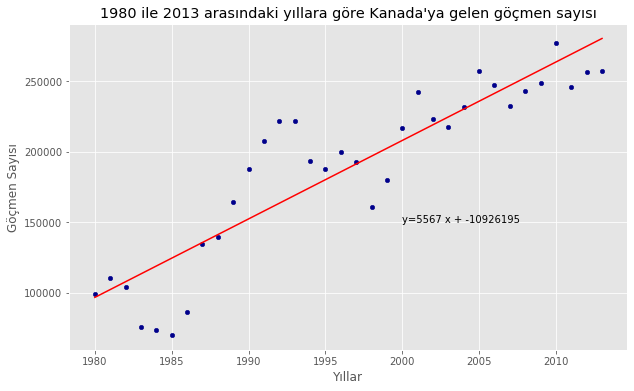

In [7]:
df_total.plot(kind="scatter",figsize=(10,6), x="year",y="total",color="darkblue")

plt.title("1980 ile 2013 arasındaki yıllara göre Kanada'ya gelen göçmen sayısı")
plt.ylabel("Göçmen Sayısı")
plt.xlabel("Yıllar")
# Trend çizgisi
plt.plot(x, fit[0] * x + fit[1], color='red') 
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

***Birde 2. dereceden bir fonksiyon ile değerlere ne kadar uydurabileceğini ve grafiğini nasıl çizdirebileceğimizi görelim***

In [8]:
x=df_total["year"]
y=df_total["total"]
fit=np.polyfit(x,y,deg=2)
fit

array([-1.32504464e+02,  5.34657418e+05, -5.39077860e+08])

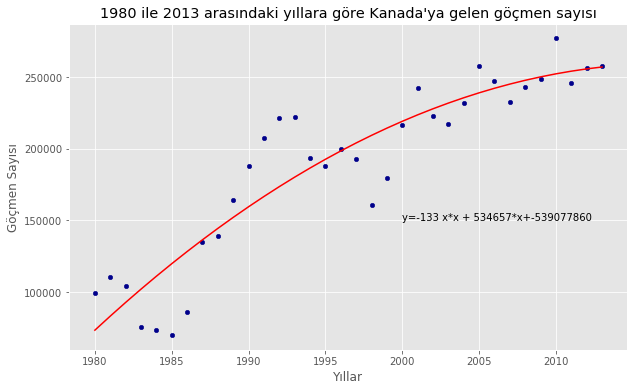

In [9]:
df_total.plot(kind="scatter",figsize=(10,6), x="year",y="total",color="darkblue")

plt.title("1980 ile 2013 arasındaki yıllara göre Kanada'ya gelen göçmen sayısı")
plt.ylabel("Göçmen Sayısı")
plt.xlabel("Yıllar")
# Trend çizgisi
plt.plot(x, fit[0] * x*x + fit[1]*x+fit[2], color='red') 
plt.annotate('y={0:.0f} x*x + {1:.0f}*x+{2:.0f}'.format(fit[0], fit[1],fit[2]), xy=(2000, 150000))

plt.show()